<a href="https://www.kaggle.com/code/andresmartinez21/classification-cats-dogs?scriptVersionId=214272580" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Clasificación de Imagenes `Dogs`🐶 `Cats` 🐈


La clasificación de imágenes, especialmente cuando se trata de diferenciar entre perros y gatos, es un tema clásico y fascinante en visión por computadora. Esto abarca desde tareas sencillas, como entrenar un modelo básico con redes neuronales, hasta desafíos más avanzados relacionados con imágenes de baja calidad, variabilidad en las poses, razas, iluminación, etc.

### Definición del Problema

Objetivo: Diseñar un modelo de vision por computadora capaz de clasificar con exactitud imágenes de “perros” y “gatos”.
    
Salida esperada: Etiquetas binarias (0 para gatos, 1 para perros) o categóricas ('gato', 'perro').
    


### Descripcion del Dataset

El Dataset se selecciono de la plataforma kaggle ['Dog and Cat'](https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset)

El conjunto de datos contiene `24.998`imágenes, divididas en `12.499` imágenes de `gatos` y `12.499` imágenes de `perros`. Las imágenes de entrenamiento se dividen por igual, entre imágenes de gatos y perros, mientras que las imágenes de prueba no están etiquetadas. Esto permite a los usuarios evaluar sus modelos en datos no vistos.

In [1]:
# importar librerias
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import warnings
warnings.filterwarnings('ignore')

# Preprocesado


+ Cambiaremos la dimensión de las imágenes a 128x128

+ Crearemos un dataset que contenga la ubicación de cada imagen, su categoría, dimensión de la imagen, y si será utilizado para entrenamiento o validación

In [2]:
# Rutas de entrada y salida
input_folder = '/kaggle/input/dog-and-cat-classification-dataset/PetImages'  # Carpeta con las imágenes originales
output_folder = 'proccessedImages'  # Carpeta donde guardar las imágenes redimensionadas

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Tamaño deseado
target_size = (128, 128)
corrupta = 0

# Procesar imágenes de cada subcarpeta (por ejemplo, Cat y Dog)
for category in ['Cat', 'Dog']:
    input_path = os.path.join(input_folder, category)
    output_path = os.path.join(output_folder, category)

    # Crear subcarpeta para cada categoría en la carpeta de salida
    os.makedirs(output_path, exist_ok=True)

    # Iterar sobre cada archivo en la carpeta
    for filename in glob.glob(os.path.join(input_path, '*.jpg')):
        try:
            # Leer la imagen
            img = cv2.imread(filename)

            # Verificar que la imagen se cargó correctamente
            if img is not None:
                # Redimensionar la imagen al tamaño deseado
                img_resized = cv2.resize(img, target_size)

                # Generar el nombre del archivo de salida
                output_file = os.path.join(output_path, os.path.basename(filename))

                # Guardar la imagen redimensionada
                cv2.imwrite(output_file, img_resized)
                #print(f"Guardada: {output_file}")
            else:
                #print(f"Imagen corrupta o ilegible: {filename}")
                corrupta +=1

        except Exception as e:
            print(f"Error procesando {filename}: {e}")

In [3]:
corrupta

52

Contamos con 52 imagenes corruptas.

Pacemos a la creación de un dataset para cargar las imagenes por lotes

In [4]:
cat_images = glob.glob(os.path.join('/kaggle/working/proccessedImages/Cat', '*.jpg'))
cat = pd.DataFrame({
    'name':cat_images,
    'label':[1] * len(cat_images),
    'img_size':[(128,128)] * len(cat_images),
    'min_pixel':[0] * len(cat_images),
    'max_pixel':[255]* len(cat_images)
    
})
dog_images = glob.glob(os.path.join('/kaggle/working/proccessedImages/Dog', '*.jpg'))
dog = pd.DataFrame({
    'name':dog_images,
    'label':[0] * len(dog_images),
    'img_size':[(128,128)] * len(dog_images),
    'min_pixel':[0] * len(dog_images),
    'max_pixel':[255]* len(dog_images)
    
})

In [5]:
def assign_train_test(df_class, train_ratio=0.8):
    train_size = int(len(df_class) * train_ratio)  # Número de datos para entrenamiento
    df_class = df_class.sample(frac=1, random_state=42)  # Mezclar los datos y saco una muestra de 100%
    df_class['set'] = ['train'] * train_size + ['test'] * (len(df_class) - train_size)
    return df_class

# Dividir gatos y perros
cats = assign_train_test(cat)
dogs = assign_train_test(dog)


In [6]:
data = pd.concat([cats,dogs])
data = data.sample(frac=1).reset_index(drop=True) # mezclar el data set
data['label']=data['label'].map({1:'Cat',0:'Dog'},)
data.head()


,name,label,img_size,min_pixel,max_pixel,set
0,/kaggle/working/proccessedImages/Dog/218.jpg,Dog,"(128, 128)",0,255,train
1,/kaggle/working/proccessedImages/Dog/12274.jpg,Dog,"(128, 128)",0,255,train
2,/kaggle/working/proccessedImages/Cat/3990.jpg,Cat,"(128, 128)",0,255,train
3,/kaggle/working/proccessedImages/Dog/1159.jpg,Dog,"(128, 128)",0,255,test
4,/kaggle/working/proccessedImages/Cat/10337.jpg,Cat,"(128, 128)",0,255,train


In [7]:

print('Cantidad de Categorias',data.label.value_counts(),end='\n')
print('Cantidad de ',data.set.value_counts(),end='\n')


Cantidad de Categorias label
Cat    12476
Dog    12470
Name: count, dtype: int64
Cantidad de  set
train    19956
test      4990
Name: count, dtype: int64


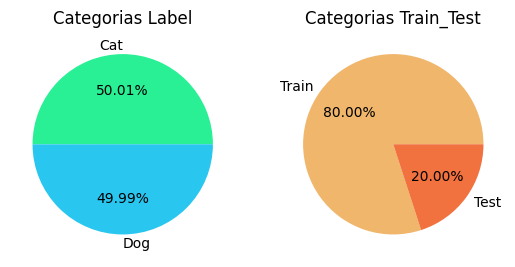

In [8]:

plt.subplot(1,2,1)
options = ["Cat", "Dog"]
count = [data.label.value_counts()[0],data.label.value_counts()[1]]

plt.pie(count, colors = ["#29F095", "#29C6F0"], labels = options, autopct = "%0.2f%%")
plt.title("Categorias Label")

plt.subplot(1,2,2)
options = ["Train", "Test"]
count = [data.set.value_counts()[0],data.set.value_counts()[1]]

plt.pie(count, colors = ["#F0B66B", "#F1713F"], labels = options, autopct = "%0.2f%%")
plt.title("Categorias Train_Test")
plt.show()

En el plot izquierdo se observa que tenemos datos balancedas con 50% para `Cats` y 49.9% para `Dogs`.

En el plot derecho mostramos cuantos datos seran proporcionado para entrenamiento y para test.

In [9]:
sample_files = data[['name', 'label']].sample(16, random_state=21)


random_files = []

for file in sample_files.iterrows():
    file_path, label  = os.path.join(file[1][0]), file[1][1]
    random_files = random_files + [(file_path, label)]

In [10]:
from PIL import Image
def display_images(random_files):

    N  = len(random_files)
    if N > 16:
        raise ValueError("N should be 16 or less to fit in a 6x6 grid.")
        
    # Set up the plot
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.flatten()

    # Hide any extra subplots
    for ax in axes[N:]:
        ax.axis('off')

    # Display each image
    for ax, image in zip(axes, random_files):
        image_path = image[0]
        label = image[1]
        
        img = Image.open(image_path)
        ax.imshow(img)
        ax.set_title(label, fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

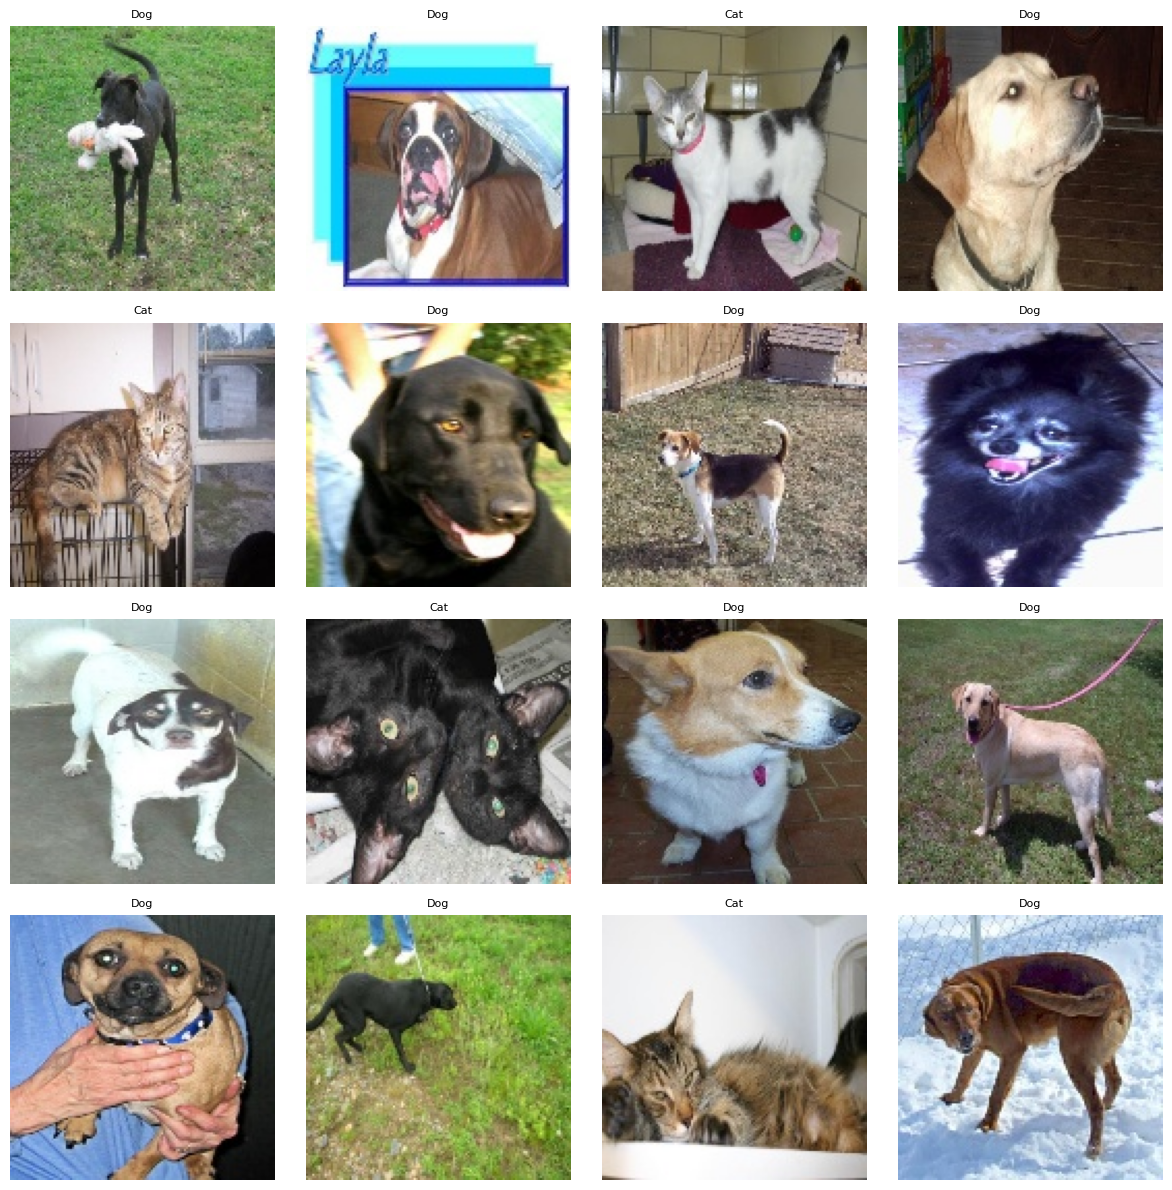

In [11]:
display_images(random_files)

### Observaciones
+ La variablilida de las fotos tanto en los pixeles, el color o la posicion de los animales prodia dificultar el entrenamiento del modelos.
+ Ademas tenemos animales donde No se puede ver todo el cuerpo ya sea por el enfoque de la fotografia o por interaccion con personas u objetos.


# Modelado CNN


In [12]:
# machine learning
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# neural networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow as tf
from keras.regularizers import L2
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.legacy import Adam


import random
import itertools

warnings.filterwarnings('ignore')

## Carga de Datos mediante lotes
Para la cargar los datos de manera eficiente utilizaremos una herramienta de DataLoader carga de datos en lotes (batches) para alimentar a la red neuronal.

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
batch_size = 36 # numero de imagenes procesadas por lote
image_size = 128 # tamaño de imagenes
channels = 3 # canales RGB

### Division de datos `Train` `Test`

In [15]:
# division de datos en 
X_train = data[data['set']=='train'][['name', 'label']]
X_test = data[data['set']=='test'][['name', 'label']]

ahora utilizaremos 20% de los datos de entrenamiento para validacion.

In [16]:
X_train, X_val = train_test_split(X_train, test_size=0.2, stratify=X_train['label'], random_state=21)

In [17]:
# Vamos a leer los datos por lotes 
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = None,
                                                    x_col= 'name',
                                                    y_col= 'label',	
                                                    class_mode='binary',
                                                    batch_size = batch_size,
                                                    target_size = (image_size,image_size))

val_generator = test_datagen.flow_from_dataframe(X_val,
                                                 directory = None,
                                                 x_col= 'name',
                                                 y_col= 'label',
                                                 class_mode='binary',
                                                 batch_size = batch_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                 )

test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory = None,
                                                  x_col= 'name',
                                                  y_col= 'label',
                                                  class_mode='binary',
                                                  batch_size = batch_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 15964 validated image filenames belonging to 2 classes.
Found 3992 validated image filenames belonging to 2 classes.
Found 4990 validated image filenames belonging to 2 classes.


### Utilidades para Validación 


In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_history(history):
    # Extract data from the history object
    history_dict = history.history
    
    # Extract metrics from history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    accuracy = history_dict.get('accuracy')
    val_accuracy = history_dict.get('val_accuracy')
    
    epochs = range(1, len(loss) + 1)
    
    # Plot training and validation loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [19]:
np.random.seed(21)

## Arquitectura del Modelo: Mark #1 

In [20]:
modelo=Sequential()
modelo.add(Conv2D(32, (3,3),input_shape=(128,128,3),activation='relu'))
modelo.add(MaxPooling2D(pool_size=((2,2))))
modelo.add(Flatten())
modelo.add(Dense(128,activation='relu')) # capa de entrada
modelo.add(Dense(50,activation='relu')) 
modelo.add(Dense(1,activation='sigmoid')) # capa de salida
modelo.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Usar la versión legacy del optimizador
    metrics=['accuracy']
)


In [21]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,257,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,264,549 (62.04 MB)

 Trainable params: 16,264,549 (62.04 MB)

 Non-trainable params: 0 (0.00 B)

### callback EarlyStopping
para penalisar el entrenamiento

In [22]:
## callback para penalisar el entrenamiento 
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

## Entrenamiento

In [23]:
history = modelo.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 20
                   )

Epoch 1/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6047 - loss: 0.8017 - val_accuracy: 0.6976 - val_loss: 0.5679
Epoch 2/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7501 - loss: 0.5174 - val_accuracy: 0.7224 - val_loss: 0.5411
Epoch 3/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8148 - loss: 0.4094 - val_accuracy: 0.7370 - val_loss: 0.5488
Epoch 4/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8770 - loss: 0.2921 - val_accuracy: 0.7327 - val_loss: 0.5860
Epoch 5/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9273 - loss: 0.1783 - val_accuracy: 0.7167 - val_loss: 0.7495
Epoch 6/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9535 - loss: 0.1147 - val_accuracy: 0.7247 - val_loss: 0.9814
Epoch 7/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9819 - loss: 0.0578 - val_accuracy: 0.7212 - val_loss: 1.1093
Epoch 8/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9866 - loss: 0.0451 - 

## Validacion

In [24]:
result = modelo.predict(test_generator, batch_size = batch_size,verbose = 1)

y_pred = np.round(result)

y_true = test_generator.labels

139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


              precision    recall  f1-score   support

           0       0.78      0.61      0.68      2496
           1       0.68      0.83      0.74      2494

    accuracy                           0.72      4990
   macro avg       0.73      0.72      0.71      4990
weighted avg       0.73      0.72      0.71      4990

Confusion matrix, without normalization


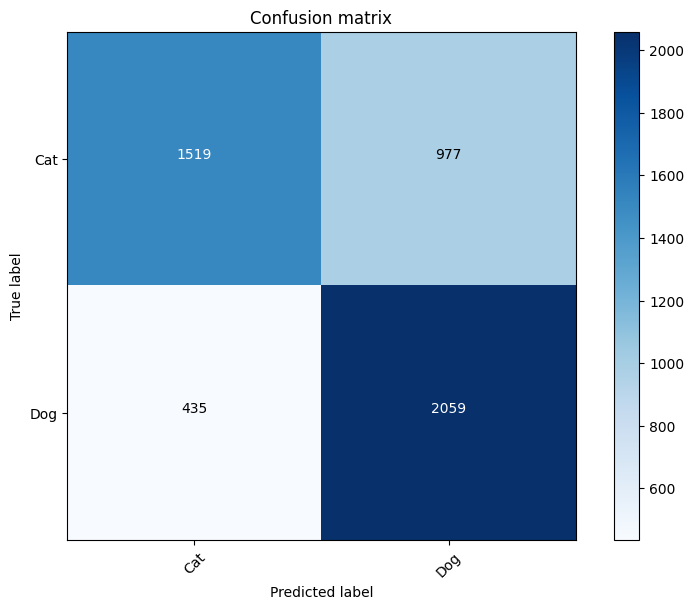

In [25]:
cm= confusion_matrix(y_true,y_pred)
classes = list(train_generator.class_indices.keys())
print(classification_report(y_true, y_pred))
plot_confusion_matrix(cm,classes)

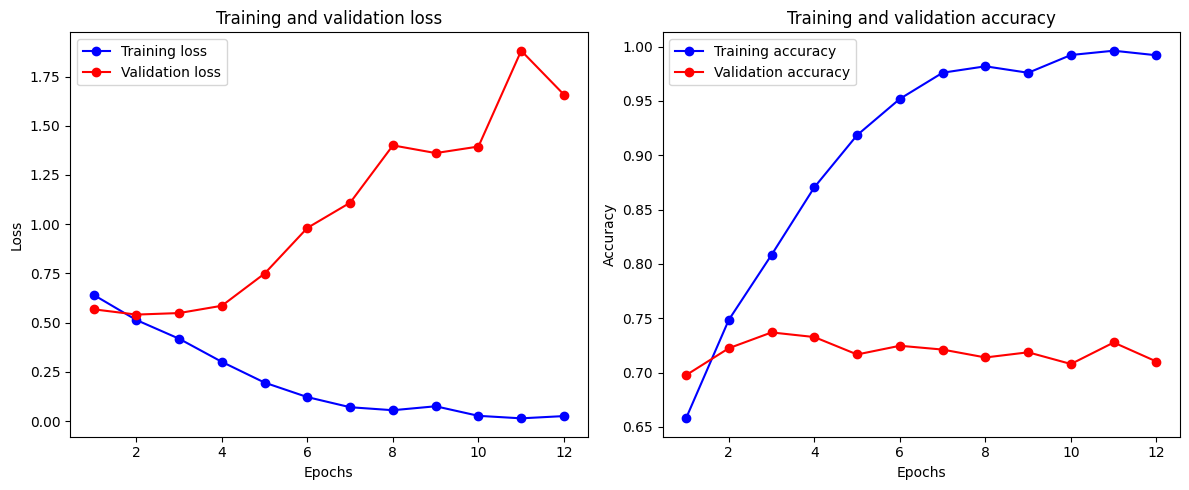

In [26]:
plot_history(history)

En las curvas de entrenamiento se evidencia un sobreentrenamiento `Overfiting` 

Optare por aplicar tecnicas de regularización como kernel_regularizer `L2`, `Dropount` y `BatchNormalization`.

##  Modelo: Mark #1.1

In [27]:
modelo2=Sequential()
modelo2.add(Conv2D(32, (3,3),input_shape=(128,128,3),activation='relu',kernel_regularizer=L2(0.01)))
modelo2.add(BatchNormalization()) 
modelo2.add(MaxPooling2D(pool_size=((2,2))))
modelo2.add(Flatten())
modelo2.add(Dropout(0.2))
modelo2.add(Dense(50,activation='relu')) 
modelo2.add(Dense(1,activation='sigmoid')) # capa de salida
modelo2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  
    metrics=['accuracy']
)

In [28]:
modelo2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │       6,350,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,351,525 (24.23 MB)

 Trainable params: 6,351,461 (24.23 MB)

 Non-trainable params: 64 (256.00 B)

In [29]:
history2 = modelo2.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 20
                   )

Epoch 1/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.5355 - loss: 1.7676 - val_accuracy: 0.4997 - val_loss: 0.7346
Epoch 2/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.5113 - loss: 0.7301 - val_accuracy: 0.5000 - val_loss: 4.8519
Epoch 3/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6262 - loss: 0.6842 - val_accuracy: 0.6578 - val_loss: 0.6666
Epoch 4/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.7171 - loss: 0.6114 - val_accuracy: 0.7149 - val_loss: 0.6073
Epoch 5/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.7477 - loss: 0.5961 - val_accuracy: 0.6911 - val_loss: 0.7024
Epoch 6/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.7922 - loss: 0.5056 - val_accuracy: 0.7237 - val_loss: 0.6068
Epoch 7/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8250 - loss: 0.4496 - val_accuracy: 0.7114 - val_loss: 0.6067
Epoch 8/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8486 - loss: 0.4034 - 

In [30]:
result2 = modelo2.predict(test_generator, batch_size = batch_size,verbose = 0)

y_pred2 = np.round(result)

y_true2 = test_generator.labels

              precision    recall  f1-score   support

           0       0.78      0.61      0.68      2496
           1       0.68      0.83      0.74      2494

    accuracy                           0.72      4990
   macro avg       0.73      0.72      0.71      4990
weighted avg       0.73      0.72      0.71      4990

Confusion matrix, without normalization


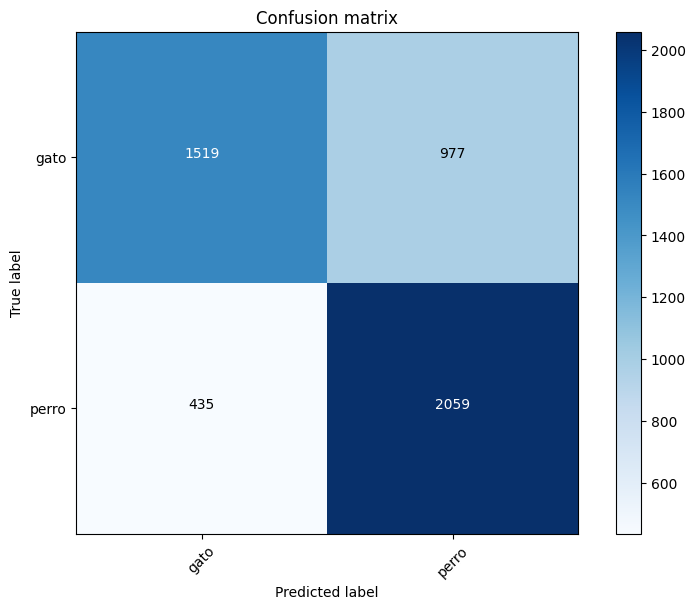

In [31]:
print(classification_report(y_true2, y_pred2))
cm = confusion_matrix(y_true2, y_pred2)
plot_confusion_matrix(cm, ['gato','perro'])

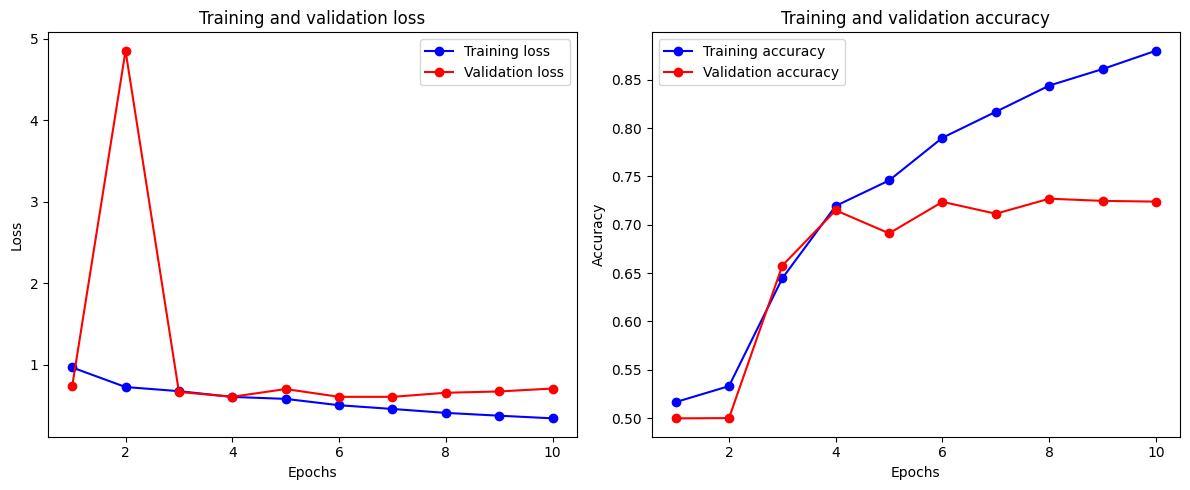

In [32]:
plot_history(history2)

##  Modelo: Mark #2
Ahora probemos con un modelo que contenga mas capas de convolución.

In [33]:
model1 = Sequential()
model1.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model1.add(MaxPooling2D(2,2))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))

model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))


model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Usar la versión legacy del optimizador
    metrics=['accuracy']
)

In [34]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history1 = model1.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 20
                   )

Epoch 1/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.5737 - loss: 0.7008 - val_accuracy: 0.7224 - val_loss: 0.5458
Epoch 2/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7410 - loss: 0.5156 - val_accuracy: 0.6976 - val_loss: 0.6076
Epoch 3/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8000 - loss: 0.4270 - val_accuracy: 0.8099 - val_loss: 0.4051
Epoch 4/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8436 - loss: 0.3552 - val_accuracy: 0.8224 - val_loss: 0.3936
Epoch 5/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8866 - loss: 0.2664 - val_accuracy: 0.8226 - val_loss: 0.4245
Epoch 6/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9268 - loss: 0.1788 - val_accuracy: 0.8272 - val_loss: 0.4861
Epoch 7/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9680 - loss: 0.0927 - val_accuracy: 0.8226 - val_loss: 0.5855
Epoch 8/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9812 - loss: 0.0569 - 

In [36]:
result = model1.predict(test_generator, batch_size = batch_size,verbose = 1)

y_pred = np.round(result)

y_true = test_generator.labels

139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2496
           1       0.81      0.84      0.83      2494

    accuracy                           0.82      4990
   macro avg       0.82      0.82      0.82      4990
weighted avg       0.82      0.82      0.82      4990

Confusion matrix, without normalization


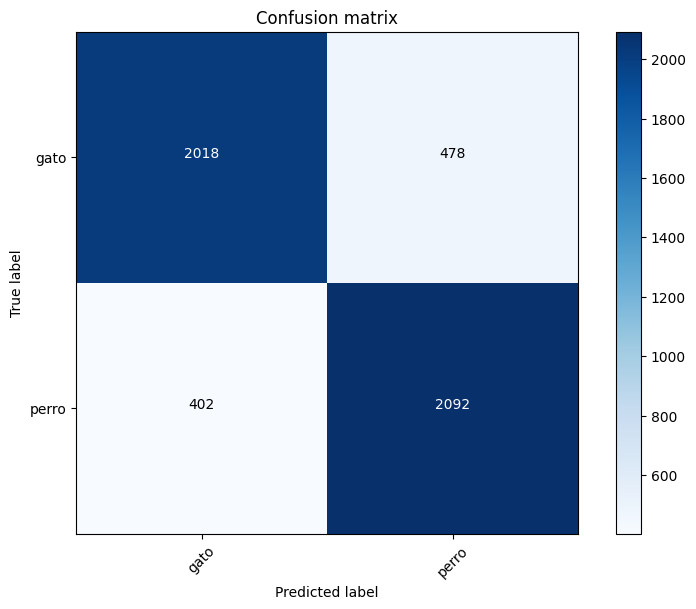

In [37]:
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ['gato','perro'])

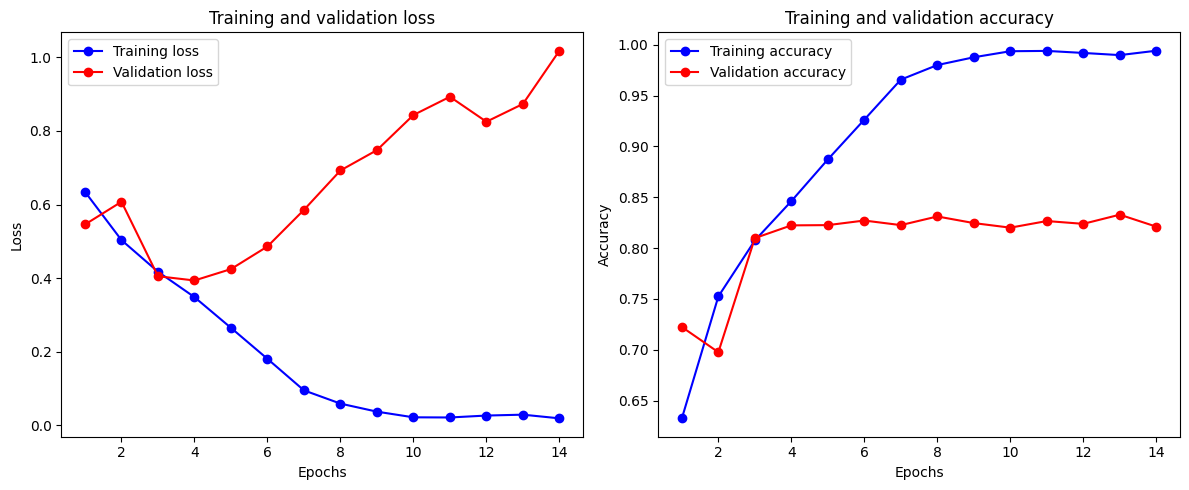

In [38]:
plot_history(history1)

tenemo nuevamente ... 


## modelo: Mark #2.1

In [39]:
model11 = Sequential()
model11.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3),kernel_regularizer=L2(0.01)))
model11.add(MaxPooling2D(2,2))
model11.add(Dropout(0.2))
model11.add(Conv2D(64, (3,3), activation='relu',))
model11.add(MaxPooling2D(2,2))
model11.add(Dropout(0.2))
model11.add(Conv2D(128, (3,3), activation='relu',kernel_regularizer=L2(0.01)))
model11.add(MaxPooling2D(2,2))
model11.add(Dropout(0.2))
model11.add(Flatten())

model11.add(Dense(1, activation='sigmoid'))
model11.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Usar la versión legacy del optimizador
    metrics=['accuracy'])

In [40]:
history11 = model11.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 20
                   )

Epoch 1/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5604 - loss: 0.8761 - val_accuracy: 0.6085 - val_loss: 0.6636
Epoch 2/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6744 - loss: 0.6283 - val_accuracy: 0.7142 - val_loss: 0.5750
Epoch 3/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.7006 - loss: 0.5972 - val_accuracy: 0.7260 - val_loss: 0.5540
Epoch 4/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7262 - loss: 0.5660 - val_accuracy: 0.7492 - val_loss: 0.5354
Epoch 5/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7342 - loss: 0.5574 - val_accuracy: 0.7528 - val_loss: 0.5289
Epoch 6/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.7483 - loss: 0.5372 - val_accuracy: 0.7668 - val_loss: 0.5152
Epoch 7/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.7549 - loss: 0.5294 - val_accuracy: 0.7663 - val_loss: 0.5133
Epoch 8/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7718 - loss: 0.5126 - 

In [41]:
result = model11.predict(test_generator, batch_size = batch_size,verbose = 1)

y_pred = np.round(result)

y_true = test_generator.labels

139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


              precision    recall  f1-score   support

           0       0.68      0.36      0.47      2496
           1       0.56      0.83      0.67      2494

    accuracy                           0.59      4990
   macro avg       0.62      0.59      0.57      4990
weighted avg       0.62      0.59      0.57      4990

Confusion matrix, without normalization


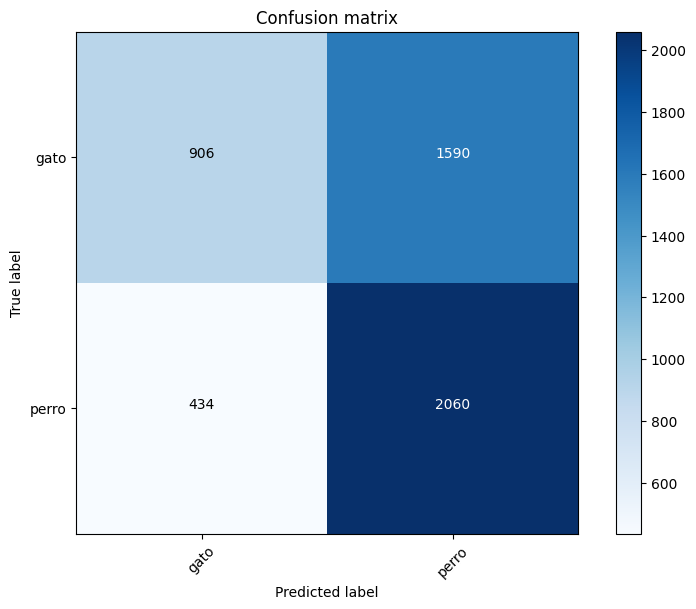

In [42]:
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ['gato','perro'])

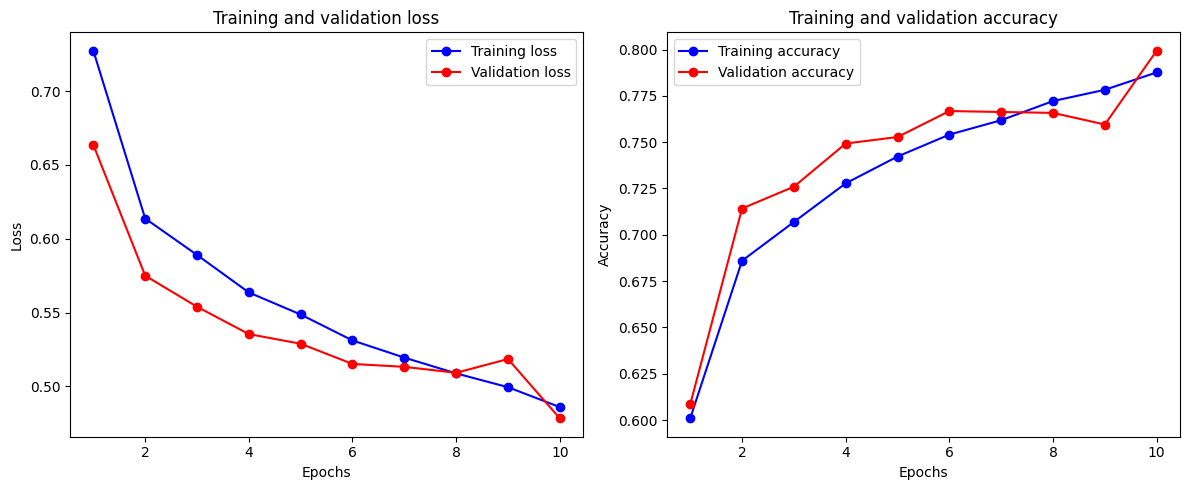

In [43]:
plot_history(history11)

## Modelo: Mark #2.1

Agregando una capa de `BatchNormalization` y una capa `densa`. 

Aumentamos las epocas a 100

In [44]:
model12 = Sequential()
model12.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3),kernel_regularizer=L2(0.01)))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))

model12.add(Conv2D(64, (3,3), activation='relu',))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))

model12.add(Conv2D(128, (3,3), activation='relu',kernel_regularizer=L2(0.01)))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))
model12.add(Flatten())

model12.add(Dense(64,activation='relu'))
model12.add(BatchNormalization())
model12.add(Dense(1, activation='sigmoid'))
model12.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Usar la versión legacy del optimizador
    metrics=['accuracy'])

In [45]:
model12.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,700,161 (6.49 MB)

 Trainable params: 1,699,585 (6.48 MB)

 Non-trainable params: 576 (2.25 KB)

In [46]:
history12 = model12.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 100
                   )

Epoch 1/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6539 - loss: 1.2852 - val_accuracy: 0.5321 - val_loss: 0.8451
Epoch 2/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7634 - loss: 0.5901 - val_accuracy: 0.7528 - val_loss: 0.5922
Epoch 3/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8156 - loss: 0.5038 - val_accuracy: 0.7876 - val_loss: 0.5450
Epoch 4/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8381 - loss: 0.4749 - val_accuracy: 0.8086 - val_loss: 0.5258
Epoch 5/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8570 - loss: 0.4412 - val_accuracy: 0.8234 - val_loss: 0.5104
Epoch 6/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8702 - loss: 0.4152 - val_accuracy: 0.8189 - val_loss: 0.5214
Epoch 7/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8962 - loss: 0.3829 - val_accuracy: 0.8131 - val_loss: 0.5674
Epoch 8/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8990 - loss: 0

In [47]:
result = model12.predict(test_generator, batch_size = batch_size,verbose = 1)

y_pred = np.round(result)

y_true = test_generator.labels

139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


              precision    recall  f1-score   support

           0       0.52      0.99      0.68      2496
           1       0.86      0.08      0.15      2494

    accuracy                           0.53      4990
   macro avg       0.69      0.53      0.41      4990
weighted avg       0.69      0.53      0.41      4990

Confusion matrix, without normalization


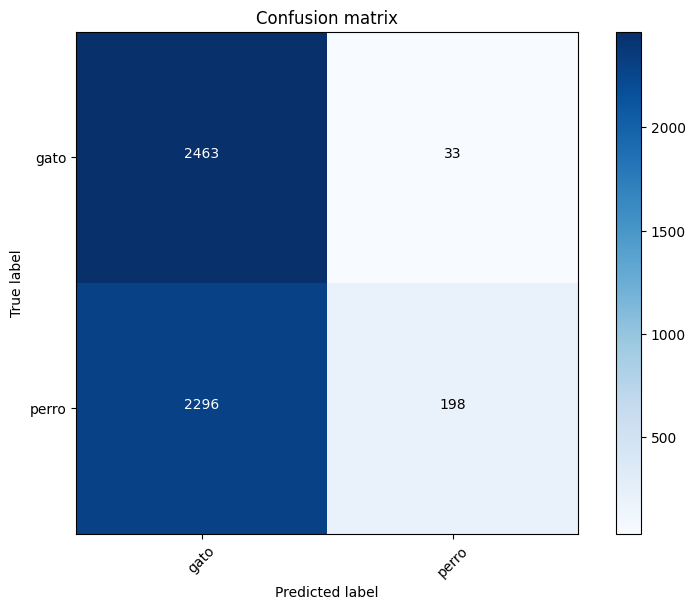

In [48]:
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ['gato','perro'])

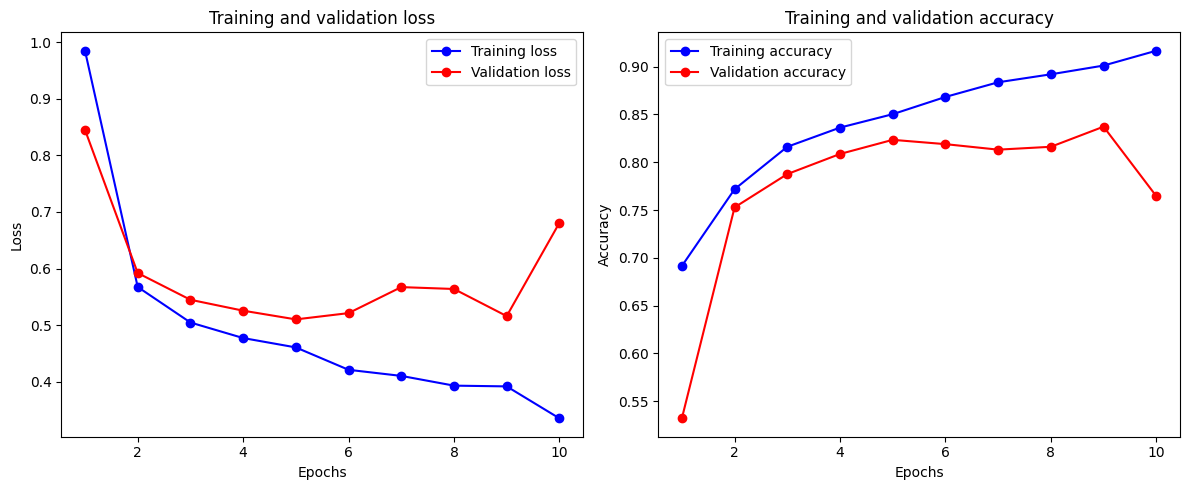

In [49]:
plot_history(history12)

## Modelo: Mark #2.2
Aumentemos la profundidad de la Red 

Dado que tenemos mucho ruido en las curvas de entrenamiento optaremos, por utilizar el collbacks `ReduceLROnPlateau` este reducir la tasa de aprendizaje cuando la métrica monitoreada (en este caso, val_loss) se detiene o deja de mejorar. Esto permite al modelo realizar ajustes más finos en los pesos y puede ayudarlo a superar un estancamiento en el entrenamiento.

In [50]:
model12 = Sequential()
model12.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3),kernel_regularizer=L2(0.01)))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))

model12.add(Conv2D(64, (3,3), activation='relu',))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))

model12.add(Conv2D(128, (3,3), activation='relu',kernel_regularizer=L2(0.01)))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))


model12.add(Conv2D(256, (3,3), activation='relu',kernel_regularizer=L2(0.01)))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))
model12.add(Flatten())

model12.add(Dense(64,activation='relu'))
model12.add(BatchNormalization())
model12.add(Dense(1, activation='sigmoid'))
model12.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Usar la versión legacy del optimizador
    metrics=['accuracy'])

In [51]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [52]:
history12 = model12.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 100
                   )

Epoch 1/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.6344 - loss: 2.4851 - val_accuracy: 0.5013 - val_loss: 1.2901 - learning_rate: 0.0010
Epoch 2/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.7485 - loss: 0.7532 - val_accuracy: 0.7179 - val_loss: 0.7146 - learning_rate: 0.0010
Epoch 3/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.7831 - loss: 0.6493 - val_accuracy: 0.7285 - val_loss: 0.7224 - learning_rate: 0.0010
Epoch 4/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8099 - loss: 0.6311 - val_accuracy: 0.7793 - val_loss: 0.7098 - learning_rate: 0.0010
Epoch 5/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8351 - loss: 0.6041 - val_accuracy: 0.7938 - val_loss: 0.6860 - learning_rate: 0.0010
Epoch 6/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8449 - loss: 0.6015 - val_accuracy: 0.6480 - val_loss: 0.8945 - learning_rate: 0.0010
Epoch 7/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8

In [53]:
result = model12.predict(test_generator, batch_size = batch_size,verbose = 1)

y_pred = np.round(result)

y_true = test_generator.labels

139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2496
           1       0.94      0.93      0.94      2494

    accuracy                           0.94      4990
   macro avg       0.94      0.94      0.94      4990
weighted avg       0.94      0.94      0.94      4990

Confusion matrix, without normalization


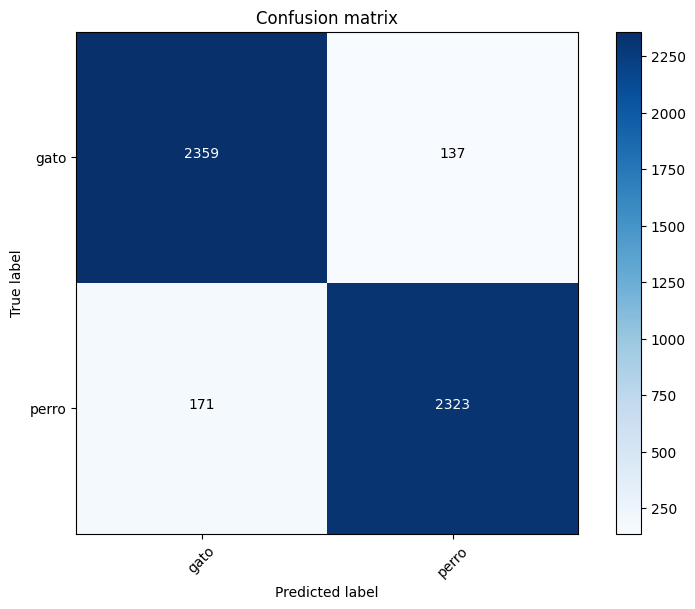

In [54]:
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ['gato','perro'])

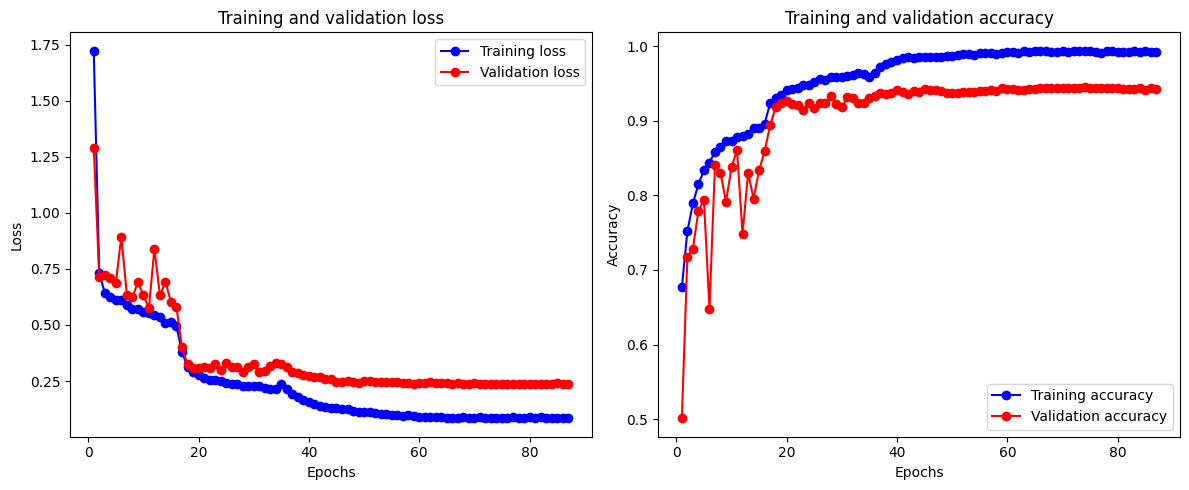

In [55]:
plot_history(history12)

### Conclusiones 
 > Optaremos por quedarnos con el modelo `Mark2.2` puesto que tiene las mejores métricas tanto en exactitud como en F1-score, además, en las curvas de entrenamiento no se evidencia ningún tipo de problema de 
sobreajuste.

> Es fundamental destacar que la obtención de este modelo requirió una exhaustiva experimentación con diversos algoritmos. Implementamos distintas capas de convolución y técnicas de regularización, como L2 y dropout, para optimizar el rendimiento. Además, el uso de callbacks resultó crucial para reducir significativamente el costo computacional.

 

Finalmente, seleccionemos una imagen de los datos de prueba y observemos su predicción.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


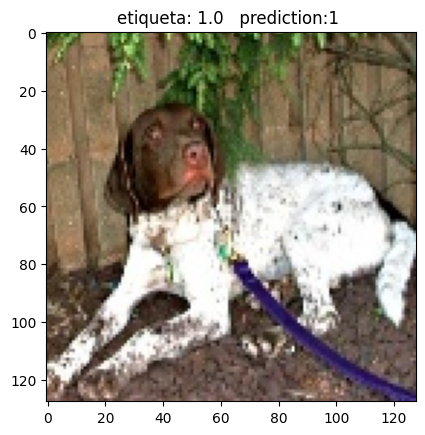

In [56]:
imagine,lab=next(test_generator)
image_batch = np.expand_dims(imagine[0], axis=0) # agrego una nueva dimensión 
img_pred=int(np.round( modelo.predict(image_batch))) #
img = imagine[0] * 255  # Escalar a 0-255
plt.imshow(img.astype(np.uint8))
plt.title('etiqueta: {}  '.format(lab[0])+' prediction:{} '.format(img_pred))
plt.show()

## Despliegue

